<a href="https://colab.research.google.com/github/sjw509/Demo/blob/master/%E6%AF%95%E8%AE%BE_%E5%85%85%E7%94%B5%E7%AB%99%E8%A7%84%E5%88%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [578]:
# 电动汽车充电站规划
# Author：Su Jianwen
 
import sys
import random
import math
import matplotlib.pyplot as plt 
import numpy as np
 
sys.setrecursionlimit(100000000)  # 手工设置递归调用深度，防止无限递归，引起 Python崩溃

In [579]:
#===============================================================================
# 求Floyd 最短路径 部分
# 交通路径参数
# Data [u, v, cost],记录节点 0 - 44 之间的连通情况
# 注意Python数组索引从0开始 
datas=[
    [0, 1, 0.93],
    [0, 4, 0.74],
    [0, 5, 0.51],
    [1, 2, 0.93],
    [1, 6, 0.42],
    [2, 3, 0.93],
    [2, 7, 0.42],
    [3, 8, 0.42],
    [4, 9, 0.89],
    [4, 15, 2.54],
    [5, 6, 0.64],
    [5, 9, 1.03],
    [5, 10, 1.28],
    [6, 7, 0.93],
    [6, 12, 0.84],
    [7, 8, 0.93],
    [7, 13, 0.84],
    [8, 14, 0.84],
    [9, 10, 0.74],
    [9, 16, 0.89],
    [10, 11, 0.64],
    [10, 17, 0.40],
    [11, 12, 0.44],
    [11, 18, 0.40],
    [12, 13, 0.93],
    [13, 14, 0.93],
    [13, 19, 0.84],
    [14, 20, 0.84],
    [15, 16, 1.90],
    [15, 21, 0.34],
    [16, 17, 0.90],
    [16, 22, 1.51],
    [16, 23, 0.89],
    [17, 18, 0.64],
    [17, 23, 1.03],
    [18, 19, 0.93],
    [18, 24, 0.84],
    [19, 20, 0.93],
    [19, 25, 0.84],
    [20, 26, 0.84],
    [21, 22, 1.13],
    [22, 28, 1.29],
    [22, 29, 1.25],
    [23, 24, 1.24],
    [23, 29, 1.04],
    [23, 30, 1.03],
    [24, 25, 0.93],
    [24, 30, 1.06],
    [24, 31, 0.84],
    [25, 26, 0.93],
    [25, 32, 0.84],
    [26, 33, 0.84],
    [27, 28, 1.25],
    [28, 34, 1.28],
    [29, 34, 1.28],
    [29, 35, 1.08],
    [30, 31, 0.64],
    [30, 35, 1.07],
    [31, 32, 0.93],
    [31, 37, 0.88],
    [32, 33, 0.93],
    [32, 38, 0.88],
    [33, 39, 0.88],
    [34, 40, 1.25],
    [35, 36, 0.60],
    [35, 40, 1.25],
    [35, 40, 1.04],
    [36, 37, 0.64],
    [36, 41, 1.05],
    [37, 38, 0.93],
    [37, 42, 0.84],
    [38, 39, 0.93],
    [38, 43, 0.84],
    [39, 44, 0.84],
    [40, 41, 0.93],
    [41, 42, 0.93],
    [42, 43, 0.93],
    [43, 44, 1.07],
    [44, 43, 1.07],
]
 
# 交通节点数
n = 45
 
# 定义无穷大
inf = 9999999999
 
# 构图
graph = [[(lambda x: 0 if x[0] == x[1] else inf)([i, j]) for j in range(n)] for i in range(n)]
parents = [[i] * n for i in range(n)]  ## 关键地方，i-->j 的父结点初始化都为 i
## 用一个二维数组 parents 记录每个结点的父结点。在找最短路的时候，更新父结点。
for u, v, c in datas:
    graph[u][v] = c  # 若是有向图，边权只赋给graph[u][v]
    graph[v][u] = c  # 若是无向图，要加上这条。
 
# 弗洛伊德算法
def floyd():
    n = len(graph)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if graph[i][k] + graph[k][j] < graph[i][j]:
                    graph[i][j] = graph[i][k] + graph[k][j]
                    parents[i][j] = parents[k][j]  # 更新父结点
 
# 打印两点间的Floyd距离
def Cost():
  print("Costs:")  # 打印最短距离
  for row in graph:
    for e in row:
        print("inf" if e == inf else "%.2f" % e, end="\t")
    print()
 
floyd() # 计算出任意两交通节点之间的最短路径，保存在 graph[i][j] 表示 i 到 j 的最短距离
# Cost() # 输出最短距离
# print(graph[0][34],'\n') 
#===============================================================================

充电站坐标： [[3.44, 2.54, 4.39, 2.69], [6.26, 5.11, 0.39, 6.31]] 

离充电站最近的交通节点（0 - 44）为:  [0, 9, 42, 4] 

离充电站 0 最近的交通节点 0 坐标: [3.71, 6.5]
离充电站 1 最近的交通节点 9 坐标: [3.4, 5.24]
离充电站 2 最近的交通节点 42 坐标: [4.64, 1]
离充电站 3 最近的交通节点 4 坐标: [3.1, 6.08]


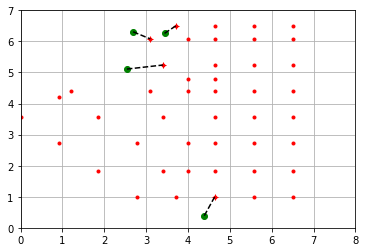

In [580]:
# 45个节点的 x 坐标
xx = [
    3.71,
    4.64,
    5.57,
    6.5,
    3.1,
    4,
    4.64,
    5.57,
    6.5,
    3.4,
    4,
    4.64,
    4.64,
    5.57,
    6.5,
    1.2,
    3.1,
    4,
    4.64,
    5.57,
    6.5,
    0.92,
    1.85,
    3.4,
    4.64,
    5.57,
    6.5,
    0,
    0.92,
    2.78,
    4,
    4.64,
    5.57,
    6.5,
    1.85,
    3.4,
    4,
    4.64,
    5.57,
    6.5,
    2.78,
    3.71,
    4.64,
    5.57,
    6.5,
]
 
# 45个节点的 y 坐标
yy = [
    6.5,
    6.5,
    6.5,
    6.5,
    6.08,
    6.08,
    6.08,
    6.08,
    6.08,
    5.24,
    4.8,
    4.8,
    5.24,
    5.24,
    5.24,
    4.4,
    4.4,
    4.4,
    4.4,
    4.4,
    4.4,
    4.2,
    3.56,
    3.56,
    3.56,
    3.56,
    3.56,
    3.56,
    2.72,
    2.72,
    2.72,
    2.72,
    2.72,
    2.72,
    1.84,
    1.84,
    1.84,
    1.84,
    1.84,
    1.84,
    1,
    1,
    1,
    1,
    1,
]
# 生成[x,y]坐标点形成的数组，
# 供后面查找节点位置使用！！
 # 可以使用循环赋值，也可以使用 list\zip函数，如
#node=list(zip(xx,yy))  # 这里的 node=[(x1,y1),(x2,y2)...]
node=[0]*45
for i in range(45):
  node[i]=[xx[i],yy[i]]# 这里的 node=[[x1,y1],[x2,y2]...]
 
# 随机生成若干点，初始化充电站地址
nx=[]
ny=[]
 
# 充电站点数
N=4
 
for i in range(N):
  nx.append(random.uniform(0,7))
  ny.append(random.uniform(0,7))
  nx =[round(a,2) for a in nx] #对随机生成的浮点数取2位小数
  ny =[round(b,2) for b in ny]
print('充电站坐标：',[nx,ny],'\n')
 
cells=[0]*N # 7个充电站的坐标
 
for j in range(N):
  cells[j]=[nx[j],ny[j]]
# print(cells,'\n') 
# -----------------------------------------------------------------------------
# 计算充电站最近的交通节点
dmin=[0]*N # 充电站最近的交通节点的欧氏距离
nd=[0]*N  # 充电站最近交通节点下标

for j in range(N):
  dmin[j] = math.sqrt((nx[j]-3.71)**2 + (ny[j]-6.5)**2)
  for i in range(45): # 递归计算 45个点中离充电站r最近的点
    d = math.sqrt((xx[i]-nx[j])**2 + (yy[i]-ny[j])**2)
    if d < dmin[j]:    # 考虑 最短的两点欧氏距离 
    #--------{......}------ # 后续筛选校核 
    #--------{......}------   考虑 配电网潮流约束 !!!
      dmin[j] = d
      xmin = xx[i]  # 定位最近的交通节点
      ymin = yy[i]  # 交通节点名称像Python数组索引一样由0开始 ！！
      nd[j]= node.index([xmin,ymin]) # 查找相应下标 
  #dmin[j] = round(dmin[j],2) # 取两位小数
 
#-------------------------------------------------------------------------------
 
print('离充电站最近的交通节点（0 - 44）为: ',nd,'\n') 
for j in range(N):
  print('离充电站',j,'最近的交通节点',nd[j],'坐标:',node[nd[j]])
# 输出交通节点离充电站的最短距离
#print('离充电站最近的交通节点的欧氏距离 dmin = ',dmin,'\n')
 
# 任一交通点到离充电站的"最短路径距离"
DMIN=[0]*N
for j in range(N):
  Dmin=[0]*45
  DMIN[j] = Dmin
  for i in range(45):
    Dmin[i] = graph[i][nd[j]]+dmin[j] 
    #Dmin[i] = round (Dmin[i],3)#取3位小数
#print('任一节点到充电站的最短路径距离 Dmin = ',DMIN,'\n')# 7个充电站
 
#-------------------------------------------------------------------------------
# 画图 (目前的充电站点是随机生成)
plt.plot(xx,yy,'r.') # 交通节点
plt.plot(nx,ny,'go') # 充电站
 
for j in range(N):
  plt.plot(xx[nd[j]],yy[nd[j]],'r+')
  plt.plot([nx[j],xx[nd[j]]],[ny[j],yy[nd[j]]],'k--') # 连接充电站和最近的交通节点
 
plt.xlim(0,8) #设置的x、y轴上下限值。
plt.ylim(0,7)
plt.grid(True)

In [581]:
# 在每个节点到各个充电站距离中选取最近的距离，确定各个服务节点归属充电站

A=[0]*45 # 各交通节点离充电站最近距离
Cell=[0]*45 # 各交通节点最近的充电站

for i in range(45):
    A[i]=DMIN[0][i]
    for j in range(N):
        if A[i] < DMIN[j][i]:
          A[i] = DMIN[j][i]
          Cell[i] = j
#print('各交通节点离充电站最近距离：',A,'\n')
print('各交通节点最近的充电站：',Cell,'\n')

Temp1=np.array(Cell) # 暂时变量，转换为numpy数组方便查找元素下标
c=[0]*N # 各充电站的交通节点服务范围

for j in range(N):
  C_1 = np.where(Temp1 == j) # 查找各节点对应最近的充电站（元素位置即交通节点）
  c2=list(C_1)
  c2=c2[0]   # 转换变量类型 tuple -> array -> list
  c[j]=list(c2)
print('各充电站的交通节点服务范围c：','\n',c,'\n') # 每个充电站的服务交通节点



各交通节点最近的充电站： [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

各充电站的交通节点服务范围c： 
 [[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], [], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], []] 



In [582]:
# 充电站定容
# 根据充电站的服务范围、车流量数据，确定各充电站的充电桩数量
q=[         # 45交通节点的车流量数据
   2990,
   2626,
   3190,
   2989,
   2940,
   6608,
   6368,
   6200,
   2658,
   6808,
   6420,
   4816,
   5530,
   4654,
   2170,
   3110,
   8068,
   4918,
   4484,
   4080,
   2320,
   2198,
   3628,
   7424,
   6024,
   3870,
   2312,
   422,
   1086,
   3484,
   4118,
   3264,
   4110,
   2370,
   654,
   3132,
   5052,
   5420,
   4802,
   2658,
   1400,
   1476,
   2022,
   1432,
   986 
]
W = [0]*N  # 各个充电站的典型日充电需求量
alpha = 0.1 # 电动汽车占比
beta = 0.1 # 有充电需求的电动汽车比例
Wev = 50 # 电动汽车的平均充电容量(kwh)
qj = [0] * N # 各个服务区内的车流量
lenc = [0] * N #各服务区交通节点数量
# c  各充电站的服务交通节点范围
 
for j in range(N):
  lenc[j]=len(c[j]) # 将各个充电站对应服务区内的交通节点对应的车流量累加
  qji = [0]*lenc[j]
  for i in range(lenc[j]):
    cj = [0]*lenc[j]
    cj[i] = (c[j][i])
    qji[i] = q[cj[i]]
  #print(qji,'\n')  
  qj[j] = sum(qji) 
  W[j] = qj[j] * alpha * beta * Wev 
  W[j] = round(W[j],2) # 取两位小数，减小浮点数加减和二进制存储带来的多位小数影响
#print(lenc)
print('各充电站典型日充电需求量 W[i]：',W,'\n')
print('各充电站服务交通节点数量:',lenc,'\n')
print('各服务区车流量总额：',qj,'\n')
 
#---------------------------------------------------------------------
u = 0.2  # 充电站的充电容量裕度
P = 96   #充电桩充电功率(kw)
Tt = 16  # 日充电有效时间(h)
kt = 1   # 充电同时率
keff = 0.9 # 充电效率
m = [0]*N # 各个充电站的充电桩数量配置
# 充电桩数量限制！！
# m_min = 10
# m_max = 30 
 
for j in range(N):
  m[j] = ( W[j]*(1+u) )/ ( P * Tt * kt * keff )
  m[j] = math.ceil(m[j]) # 对充电桩数量向上取整
 
print('各充电站的充电桩数量配置 m[i]：',m,'\n')

各充电站典型日充电需求量 W[i]： [30047.0, 0.0, 53598.5, 0.0] 

各充电站服务交通节点数量: [21, 0, 24, 0] 

各服务区车流量总额： [60094, 0, 107197, 0] 

各充电站的充电桩数量配置 m[i]： [27, 0, 47, 0] 



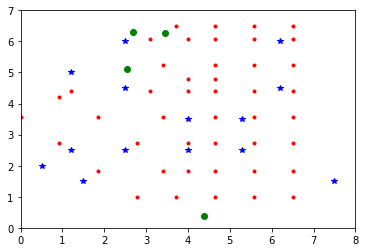

In [583]:
# IEEE 14节点 配电网节点坐标及负荷
# 配电网节点x坐标
bx = [
    1.2,
    2.5,
    6.2,
    6.2,
    2.5,
    1.2,
    5.3,
    4.0,
    5.3,
    4.0,
    2.5,
    0.5,
    1.5,
    7.5,
]
# 配电网节点y坐标
by = [
    5.0,
    6.0,
    6.0,
    4.5,
    4.5,
    2.5,
    3.5,
    3.5,
    2.5,
    2.5,
    2.5,
    2.0,
    1.5,
    1.5,
]
bus = [0]*14
for k in range(14):
  bus[k] = [bx[k],by[k]]

# 配电网节点负荷
Pg = [
    0,
    21.7,
    94.2,
    47.8,
    7.6,
    11.2,
    0,
    0,
    29.5,
    9.0,
    3.5,
    6.1,
    13.5,
    14.9,
]

#print("bx:",bx,'\n',"by:",by,'\n','bus:',bus,'\n',"Pg:",Pg,'\n')
plt.plot(bx,by,'b*') # 配电网节点
plt.plot(xx,yy,'r.') # 交通节点
plt.plot(nx,ny,'go') # 充电站
plt.xlim(0,8)
plt.ylim(0,7)
plt.grid(False)

最近配网节点下标 [1, 4, 9, 1] 

充电站离配网节点最短距离 [0.98, 0.61, 2.15, 0.36] 



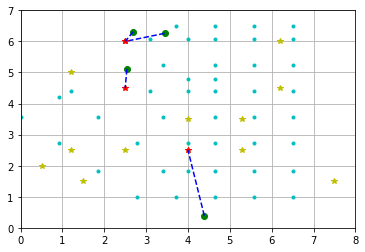

In [616]:
# 充电站接入最近的配电网节点
# 计算充电站最近的交通节点

dbmin=[0]*N # 充电站最近的配电节点的欧氏距离
nb=[0]*N  # 充电站最近的配电节点下标

for j in range(N):
  dbmin[j] = math.sqrt((nx[j]-1.2)**2 + (ny[j]-5.0)**2)
  for i in range(14): # 递归计算,14个点中离充电站最近的点
    db = math.sqrt((bx[i]-nx[j])**2 + (by[i]-ny[j])**2)
    if db < dbmin[j]:  # 充电站离配电网节点的最短距离 
      dbmin[j] = db
      bxmin = bx[i]  # 定位最近的配电节点
      bymin = by[i]  
      nb[j]= bus.index([bxmin,bymin])
  dbmin[j]=round(dbmin[j],2)
print('最近配网节点下标',nb,'\n')
print('充电站离配网节点最短距离',dbmin,'\n')
plt.plot(nx,ny,'go')
plt.plot(bx,by,'y*')
plt.plot(xx,yy,'c.') 
for j in range(N):
  plt.plot(bx[nb[j]],by[nb[j]],'r*')
  plt.plot([nx[j],bx[nb[j]]],[ny[j],by[nb[j]]],'b--') # 连接充电站和最近的交通节点
plt.xlim(0,8)
plt.ylim(0,7)
plt.grid(True)

#plt.rcParams['figure.figsize'] = (8.0, 8.0) # 设置figure_size尺寸


In [591]:
# 约束条件：<---------------------------------------------    !!!!!
# 1.充电站数量约束
# 2.充电桩数量m的上下限

# 3.潮流约束，各节点电压上下限
  # 潮流计算部分 与前面的网损计算 一同计算。。。

In [592]:
# 优化算法 <--------------------------------------------    !!!!!
# 更新站点使之满足要求

In [585]:
# 充电站规划成本计算
# min C = Σ（C1+C2+C3）+C4
 # C1：充电站的年建设成本
  # 年建设成本 = （充电桩成本 + 站用变压器成本 + 配电网线路成本 + 基建费用 ）*（贴现率与运行年限构成的系数）
 # C2：充电站的运行成本
  # 运维成本研究较为复杂
  # 考虑适当简化：C2 = 年建设成本C2*比例系数
 # C3：用户年出行成本
  # 出行成本= 充电电价成本 + 时间成本
 # C4：接入充电站后的年网损成本
 # Σ网损增量*电网公司各时段网购电价

In [586]:
#-------------------------------------------------------------------------------
# C1 年建设成本计算
 
r0 = 0.1  # 贴现率
a = 20  # 充电站的运行年限
F = 1 # 充电桩单价 <-------------------------- !!!!
E =  1 # 变压器单价 <------------------------ !!!!
c1 =  1 # 连接配电网线路 单位长度成本 <----- !!!!
# m    # 各充电站的充电桩数量
e = [0]*N # 各充电站的变压器数量
l = dbmin # 各充电站到配电网节点的线路长度
w = [0]*N # 各充电站的基建费用
C1 = [0]*N # 各充电站的年建设成本 
 
k = (r0*(1+r0)**a)/((1+r0)**a-1) # 贴现率与运行年限构成的系数
for i in range(N):
  C1[i] = (m[i]*F + e[i]*E + l[i]*c1 + w[i])* k 
  C1[i] = round(C1[i],4)
print('各充电站的年建设成本C1:','\n',C1,'\n')
 


各充电站的年建设成本C1: 
 [3.2865, 0.0717, 5.7731, 0.0423] 



In [587]:
#------------------------------------------------------------------------------- 
# C2 运行成本 (简化后)
 
Eta = 0.01  # 考虑简化，折算比例系数η
C2=[0]*N
for i in range(N):
  C2[i] = C1[i]*Eta
  C2[i] = round(C2[i],6)
print('各充电站的运行成本C2：','\n',C2,'\n')


各充电站的运行成本C2： 
 [0.032865, 0.000717, 0.057731, 0.000423] 



In [588]:
#-------------------------------------------------------------------------------
# C3 用户出行成本
# 有充电需求的电动汽车用户，在前往充电站充电的路途中消耗了电动汽车的电能且浪费了自己的时间
 # 即：用户出行成本 = 充电成本 + 时间成本

C3 = [0]*N
gk = 6   # 电动汽车每单位电量的行驶距离(km/kWh)
pev = 0.8  # 电动汽车的充电电价 (元/kWh)
ct = 18   # 电动汽车用户的时间成本 (元/h)
Vev = 30  # 电动汽车的平均车速 （km/h）

nev =[0]*N   # 充电站i的服务内有充电需求的电动汽车数量(辆)
for i in range(N):
  nev[i] = qj[i] * alpha * beta
  nev[i] = math.ceil(nev[i]) #  对电动汽车数量向上取整 

print('各服务区内有充电需求的电动汽车数量nev：',nev,'\n')

nevi = [[]]*N
dz = [[]]*N # 第z辆电动汽车到充电站i的行驶距离(km)
for j in range(N):
  lenc[j]=len(c[j]) # 将各个充电站对应服务区内的交通节点对应的车流量累加
  nevj = [0]*lenc[j]
  dzj = [0]*lenc[j]
  for i in range(lenc[j]):
    cj = [0]*lenc[j]
    cj[i] = (c[j][i])
    dzj[i] = A[cj[i]]
    nevj[i] = math.ceil(q[cj[i]] * alpha * beta)
  #print('充电站服务区',j,'的y有充电需求的电动车数量',nevj)
  nevi[j]=nevj 
  dz[j] = dzj     

#print('\n','各服务区内不同行驶距离的充电需求的电动汽车数量：',nevi,'\n')
#print('各服务区包含的交通节点下标：',c,'\n')
#print('交通节点离充电站的最短距离',dz,'\n')

Dz = [[]]*N
DZ = [0]*N
for j in range(N):
  Dzj = [0]*lenc[j]
  for i in range(lenc[j]):
    Dzj[i] = dz[j][i] * nevi[j][i]    # 各交通节点需要充电的车辆所行驶距离
  Dz[j] = Dzj
  DZ[j] = sum(Dz[j])
  C3[j] = ( ((DZ[j]/gk) * pev)+((DZ[j]/Vev) * ct) ) * 356
  C3[j] = math.ceil(C3[j])

#print(DZ,'\n')
print('各充电站的用户出行成本C3:','\n',C3,'\n')
print(sum(C3))

各服务区内有充电需求的电动汽车数量nev： [601, 0, 1072, 0] 

各充电站的用户出行成本C3: 
 [921653, 0, 1594024, 0] 

2515677


In [589]:
# -----------------------------------------------------------------------------
# 充电站接入配电网后增加的年网损成本
  #!!!潮流计算，网损计算
p = 1       # 电网公司含税网购平均电价 <---------------------  ???
Ploss1 = 0  # 未接入充电站前配电网的有功网损功率 <---------- ????
Ploss2 = 0 # 接入充电站后配电网的有功网损功率 <------------ ????
C4 = p * ( Ploss2 - Ploss1 ) # 增加的年网损成本

print('年网损成本C4：','\n',C4,'\n')

年网损成本C4： 
 0 



In [590]:
# 目标函数： 总成本最小
# min C = Σ（C1+C2+C3）+C4
print(C1,'\n',C2,'\n',C3,'\n')
for i in range(N):
  C_123 = 0
  C_123 = C_123+(C1[i]+C2[i]+C3[i])
C = C_123+C4

print('充电站总规划成本C：','\n',C,'\n')


[3.2865, 0.0717, 5.7731, 0.0423] 
 [0.032865, 0.000717, 0.057731, 0.000423] 
 [921653, 0, 1594024, 0] 

充电站总规划成本C： 
 0.042723 

